In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir("C:\\Users\\shalini lingampally\\Desktop\\R program\\projects\\proj\\pr\\project")
print(os.getcwd())

C:\Users\shalini lingampally\Desktop\R program\projects\proj\pr\project


In [2]:
Lone = pd.read_csv('train_ctrUa4K.csv')
print(Lone.shape)
print(Lone.head())
print(Lone.columns.values)

(614, 13)
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2         

In [3]:
Lone.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
np.unique(Lone.Loan_Status,return_counts=True)

(array(['N', 'Y'], dtype=object), array([192, 422], dtype=int64))

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Loan_Status = le.fit_transform(Lone.Loan_Status)
print(np.unique(Loan_Status,return_counts=True))
print(type(Loan_Status))
print(Loan_Status.shape)

(array([0, 1]), array([192, 422], dtype=int64))
<class 'numpy.ndarray'>
(614,)


In [6]:
# Y [Loan approved status %]
print(422/(422+192))

0.6872964169381107


In [7]:
# N [Loan not approved status %]
print(192/(422+192))

0.3127035830618892


In [8]:
Lone.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
Lone.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
from collections import Counter
print(Counter(Lone.Gender))
print(Counter(Lone.Married))
print(Counter(Lone.Dependents))
print(Counter(Lone.Self_Employed))
print(Counter(Lone.Property_Area))

Counter({'Male': 489, 'Female': 112, nan: 13})
Counter({'Yes': 398, 'No': 213, nan: 3})
Counter({'0': 345, '1': 102, '2': 101, '3+': 51, nan: 15})
Counter({'No': 500, 'Yes': 82, nan: 32})
Counter({'Semiurban': 233, 'Urban': 202, 'Rural': 179})


In [11]:
Lone.Gender.fillna('Male',inplace=True)
print(Counter(Lone.Gender))
Lone.Married.fillna('Yes',inplace=True)
print(Counter(Lone.Married))
Lone.Dependents.fillna('0',inplace=True)
print(Counter(Lone.Dependents))
Lone.Self_Employed.fillna('No',inplace=True)
print(Counter(Lone.Self_Employed))

Counter({'Male': 502, 'Female': 112})
Counter({'Yes': 401, 'No': 213})
Counter({'0': 360, '1': 102, '2': 101, '3+': 51})
Counter({'No': 532, 'Yes': 82})


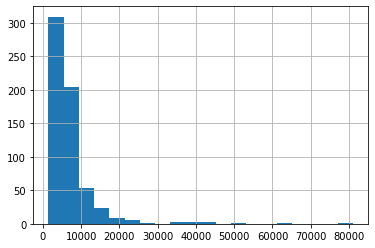

In [12]:
Lone['TotalIncome'] = Lone['ApplicantIncome'] + Lone['CoapplicantIncome']
Lone['TotalIncome'].hist(bins=20)

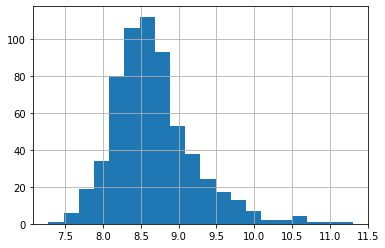

In [13]:
Lone['TotalIncome_log'] = np.log(Lone['TotalIncome'])
Lone['TotalIncome_log'].hist(bins=20)

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


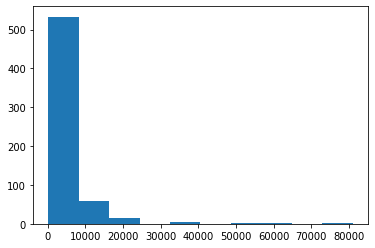

In [14]:
print(Lone.ApplicantIncome.describe())
plt.hist(Lone.ApplicantIncome)
plt.show()

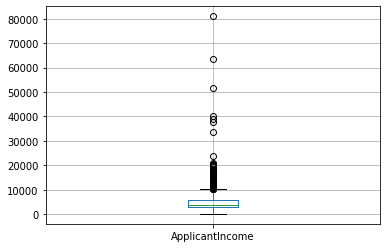

In [15]:
Lone.boxplot(column='ApplicantIncome')

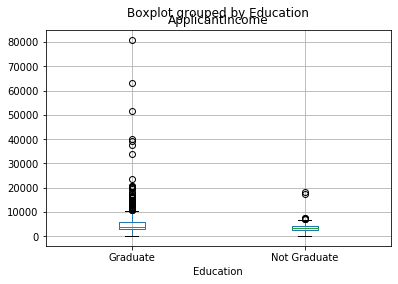

In [16]:
Lone.boxplot(column='ApplicantIncome', by = 'Education')

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64


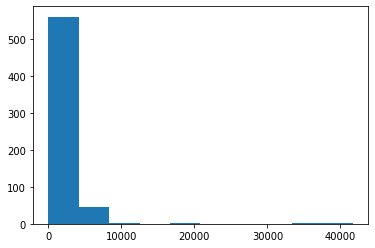

In [17]:
print(Lone.CoapplicantIncome.describe())
plt.hist(Lone.CoapplicantIncome)
plt.show()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64


C:\Users\shalini lingampally\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\shalini lingampally\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


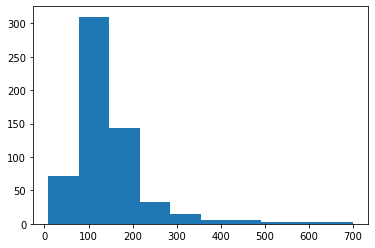

In [18]:
# median
print(Lone.LoanAmount.describe())
plt.hist(Lone.LoanAmount)
plt.show()
Lone.LoanAmount.fillna(128,inplace=True)

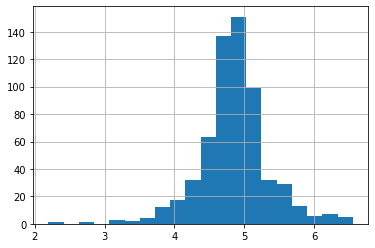

In [19]:
Lone['LoanAmount_log'] = np.log(Lone['LoanAmount'])
Lone['LoanAmount_log'].hist(bins=20)

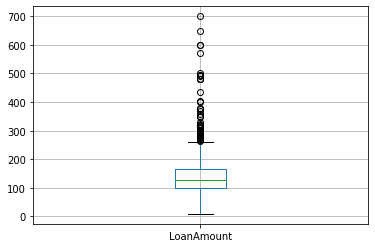

In [20]:
Lone.boxplot(column='LoanAmount')

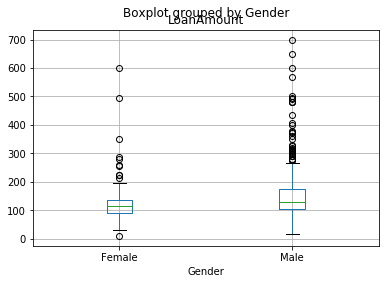

In [21]:
Lone.boxplot(column='LoanAmount', by = 'Gender')

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64


C:\Users\shalini lingampally\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\shalini lingampally\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


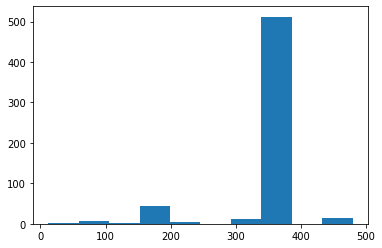

In [22]:
# median
print(Lone.Loan_Amount_Term.describe())
plt.hist(Lone.Loan_Amount_Term)
plt.show()
Lone.Loan_Amount_Term.fillna(360,inplace=True)

count    564.000000
mean       0.842199
std        0.364878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64


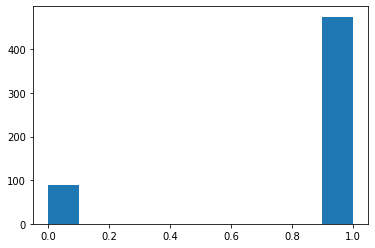

In [23]:
# median
print(Lone.Credit_History.describe())
plt.hist(Lone.Credit_History)
plt.show()
Lone.Credit_History.fillna(1,inplace=True)

In [24]:
pd.crosstab(Lone ['Credit_History'], Lone['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,110,415,525
All,192,422,614


In [25]:
Lonetest = pd.read_csv("test_lAUu6dG.csv")
print(Lonetest.shape)
print(Lonetest.head())
print(Lonetest.columns.values)

(367, 12)
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3           

In [26]:
Lonetest.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [27]:
Lonetest.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [28]:
from collections import Counter
print(Counter(Lonetest.Gender))
print(Counter(Lonetest.Dependents))
print(Counter(Lonetest.Self_Employed))

Counter({'Male': 286, 'Female': 70, nan: 11})
Counter({'0': 200, '2': 59, '1': 58, '3+': 40, nan: 10})
Counter({'No': 307, 'Yes': 37, nan: 23})


In [29]:
Lonetest.Gender.fillna('Male',inplace=True)
print(Counter(Lonetest.Gender))
Lonetest.Dependents.fillna('0',inplace=True)
print(Counter(Lonetest.Dependents))
Lonetest.Self_Employed.fillna('No',inplace=True)
print(Counter(Lonetest.Self_Employed))

Counter({'Male': 297, 'Female': 70})
Counter({'0': 210, '2': 59, '1': 58, '3+': 40})
Counter({'No': 330, 'Yes': 37})


count    362.000000
mean     136.132597
std       61.366652
min       28.000000
25%      100.250000
50%      125.000000
75%      158.000000
max      550.000000
Name: LoanAmount, dtype: float64


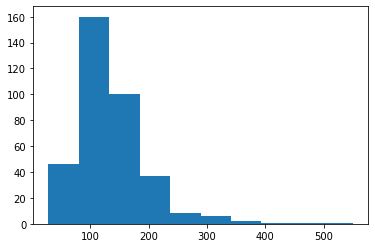

In [30]:
print(Lonetest.LoanAmount.describe())
plt.hist(Lonetest.LoanAmount)
plt.show()
Lonetest.LoanAmount.fillna(125,inplace=True)

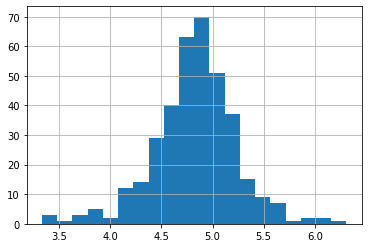

In [31]:
Lonetest['LoanAmount_log'] = np.log(Lonetest['LoanAmount'])
Lonetest['LoanAmount_log'].hist(bins=20)

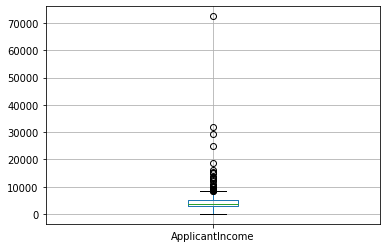

In [32]:
Lonetest.boxplot(column='ApplicantIncome')

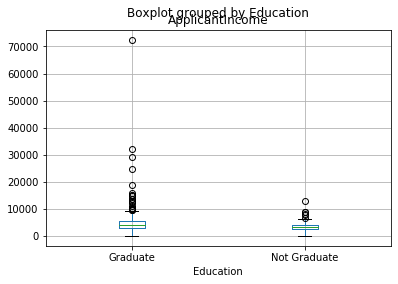

In [33]:
Lonetest.boxplot(column='ApplicantIncome', by = 'Education')

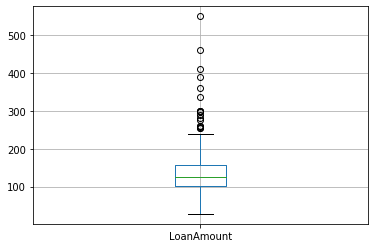

In [34]:
Lonetest.boxplot(column='LoanAmount')

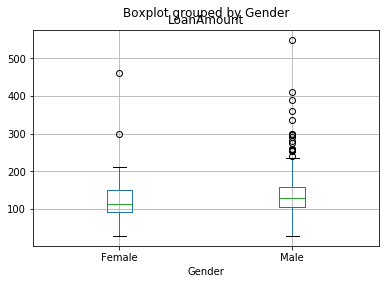

In [35]:
Lonetest.boxplot(column='LoanAmount', by = 'Gender')

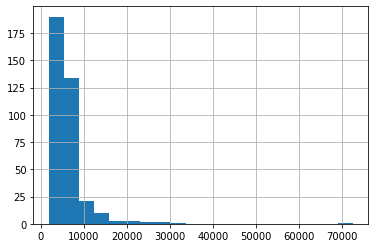

In [36]:
Lonetest['TotalIncome'] = Lonetest['ApplicantIncome'] + Lonetest['CoapplicantIncome']
Lonetest['TotalIncome'].hist(bins=20)

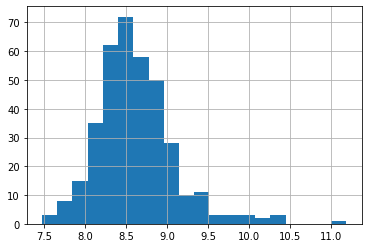

In [37]:
Lonetest['TotalIncome_log'] = np.log(Lonetest['TotalIncome'])
Lonetest['TotalIncome_log'].hist(bins=20)

count    361.000000
mean     342.537396
std       65.156643
min        6.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64


C:\Users\shalini lingampally\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\shalini lingampally\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


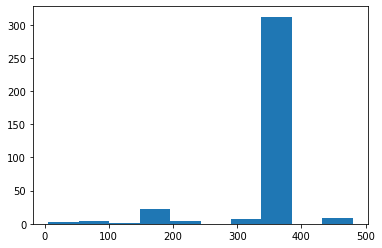

In [38]:
print(Lonetest.Loan_Amount_Term.describe())
plt.hist(Lonetest.Loan_Amount_Term)
plt.show()
Lonetest.Loan_Amount_Term.fillna(360,inplace=True)

count    338.000000
mean       0.825444
std        0.380150
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64


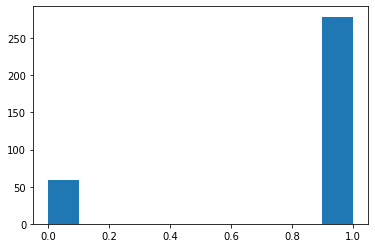

In [39]:
print(Lonetest.Credit_History.describe())
plt.hist(Lonetest.Credit_History)
plt.show()
Lonetest.Credit_History.fillna(1,inplace=True)

In [40]:
Lonetest.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [41]:
LoanX = Lone.drop(Lone.columns[[0,12]],axis=1)
LoantestX = Lonetest.drop(Lone.columns[[0]],axis=1)
LoantestID = Lonetest[['Loan_ID']]
LoanY = Lone[['Loan_Status']] 
print(LoantestID.shape)
print(LoanX.columns)
print(LoanX.shape)
print(type(LoanX))
print(LoantestX.columns)
print(LoantestX.shape)
print(type(LoantestX))
print(LoanY.columns)
print(LoanY.shape)
print(type(LoanY))

(367, 1)
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'TotalIncome',
       'TotalIncome_log', 'LoanAmount_log'],
      dtype='object')
(614, 14)
<class 'pandas.core.frame.DataFrame'>
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'LoanAmount_log',
       'TotalIncome', 'TotalIncome_log'],
      dtype='object')
(367, 14)
<class 'pandas.core.frame.DataFrame'>
Index(['Loan_Status'], dtype='object')
(614, 1)
<class 'pandas.core.frame.DataFrame'>


In [42]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
X_train_cont = MMS.fit_transform(LoanX[['LoanAmount_log','TotalIncome_log','Loan_Amount_Term','Credit_History']])
X_test_cont = MMS.transform(LoantestX[['LoanAmount_log','TotalIncome_log','Loan_Amount_Term','Credit_History']])

In [43]:
ContColumns = ['LoanAmount_log', 'TotalIncome_log','Loan_Amount_Term','Credit_History']

X_train_cont_t = pd.DataFrame(X_train_cont,columns=ContColumns)
X_test_cont_t = pd.DataFrame(X_test_cont,columns=ContColumns)

print(X_train_cont_t.shape)
print(X_test_cont_t.shape)

(614, 4)
(367, 4)


In [44]:
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder(sparse = False,handle_unknown='ignore')

X_train_cat = OHE.fit_transform(LoanX[['Gender','Married','Dependents','Education','Self_Employed','Property_Area']])

X_test_cat = OHE.transform(LoantestX[['Gender','Married','Dependents','Education','Self_Employed','Property_Area']])

OHE.categories_

catcolumns = ['Female','Male','No','Yes','0','1','2','3+','Graduate','Not Graduate','No','Yes','Rural','Semiurban','Urban']

X_train_cat_t = pd.DataFrame(X_train_cat,columns=catcolumns)
X_test_cat_t = pd.DataFrame(X_test_cat,columns=catcolumns)

print(X_train_cat_t.shape)
print(X_test_cat_t.shape)

(614, 15)
(367, 15)


In [45]:
X_train_cont_cat = pd.concat([X_train_cont_t,X_train_cat_t],axis=1)
print(X_train_cont_cat.shape)
X_test_cont_cat = pd.concat([X_test_cont_t,X_test_cat_t],axis=1)
print(X_test_cont_cat.shape)

(614, 19)
(367, 19)


In [46]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(class_weight = 'balanced',solver='saga',
                         max_iter=500,penalty = 'l1')
parms = {'C': [0.01,0.05,0.2,0.1,0.5,1,2]} 

from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(estimator = lgr,param_grid = parms, scoring = 'f1_macro',
                  cv=5,refit=True,return_train_score = True,verbose=10,
                  n_jobs=1)
CV.fit(X_train_cont_cat,LoanY)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] C=0.01 ..........................................................
[CV] .......... C=0.01, score=(train=0.407, test=0.409), total=   0.1s
[CV] C=0.01 ..........................................................
[CV] .......... C=0.01, score=(train=0.407, test=0.409), total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .......... C=0.01, score=(train=0.238, test=0.241), total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .......... C=0.01, score=(train=0.408, test=0.406), total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .......... C=0.01, score=(train=0.238, test=0.237), total=   0.0s
[CV] C=0.05 ..........................................................
[CV] .......... C=0.05, score=(train=0.730, test=0.731), total=   0.0s
[CV] C=0.05 ..........................................................
[CV] .......... C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\shalini lingampally\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\shalini lingampally\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\shalini lingampally\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV] C=0.05 ..........................................................
[CV] .......... C=0.05, score=(train=0.741, test=0.684), total=   0.0s
[CV] C=0.05 ..........................................................
[CV] .......... C=0.05, score=(train=0.709, test=0.806), total=   0.0s
[CV] C=0.05 ..........................................................
[CV] .......... C=0.05, score=(train=0.726, test=0.745), total=   0.0s
[CV] C=0.2 ...........................................................
[CV] ........... C=0.2, score=(train=0.730, test=0.731), total=   0.0s
[CV] C=0.2 ...........................................................
[CV] ........... C=0.2, score=(train=0.743, test=0.668), total=   0.0s
[CV] C=0.2 ...........................................................
[CV] ........... C=0.2, score=(train=0.741, test=0.684), total=   0.0s
[CV] C=0.2 ...........................................................
[CV] ........... C=0.2, score=(train=0.705, test=0.800), total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
C:\Users\shalini lingampally\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
C:\Users\shalini lingampally\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
C:\Users\shalini lingampally\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

[CV] ........... C=0.2, score=(train=0.732, test=0.745), total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ........... C=0.1, score=(train=0.730, test=0.731), total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ........... C=0.1, score=(train=0.743, test=0.675), total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ........... C=0.1, score=(train=0.741, test=0.684), total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ........... C=0.1, score=(train=0.709, test=0.806), total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ........... C=0.1, score=(train=0.726, test=0.745), total=   0.0s
[CV] C=0.5 ...........................................................
[CV] ........... C=0.5, score=(train=0.725, test=0.752), total=   0.0s
[CV] C=0.5 ...........................................................
[CV] .

C:\Users\shalini lingampally\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shalini lingampally\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shalini lingampally\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shalini lingampally\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was e

[CV] ........... C=0.5, score=(train=0.707, test=0.784), total=   0.0s
[CV] C=0.5 ...........................................................
[CV] ........... C=0.5, score=(train=0.703, test=0.717), total=   0.0s
[CV] C=1 .............................................................
[CV] ............. C=1, score=(train=0.712, test=0.766), total=   0.0s
[CV] C=1 .............................................................
[CV] ............. C=1, score=(train=0.746, test=0.648), total=   0.0s
[CV] C=1 .............................................................
[CV] ............. C=1, score=(train=0.737, test=0.675), total=   0.0s
[CV] C=1 .............................................................
[CV] ............. C=1, score=(train=0.705, test=0.764), total=   0.0s
[CV] C=1 .............................................................
[CV] ............. C=1, score=(train=0.706, test=0.675), total=   0.0s
[CV] C=2 .............................................................


C:\Users\shalini lingampally\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shalini lingampally\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shalini lingampally\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shalini lingampally\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was e

[CV] ............. C=2, score=(train=0.723, test=0.771), total=   0.0s
[CV] C=2 .............................................................
[CV] ............. C=2, score=(train=0.741, test=0.627), total=   0.0s
[CV] C=2 .............................................................
[CV] ............. C=2, score=(train=0.737, test=0.688), total=   0.0s
[CV] C=2 .............................................................
[CV] ............. C=2, score=(train=0.699, test=0.783), total=   0.0s
[CV] C=2 .............................................................
[CV] ............. C=2, score=(train=0.707, test=0.675), total=   0.0s


C:\Users\shalini lingampally\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.9s finished
C:\Users\shalini lingampally\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=500, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=1,
             param_grid={'C': [0.01, 0.05, 0.2, 0.1, 0.5, 1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1_macro', verbose=10)

In [53]:
print(CV.best_estimator_.coef_)
print(CV.best_estimator_.intercept_)

[[0.         0.         0.         1.85154604 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.01585148
  0.        ]]
[-1.49318299]


In [54]:
print(CV.best_score_)
print(CV.best_params_)

0.7281771563821333
{'C': 0.05}


In [55]:
Predict_Prob = CV.predict_proba(X_train_cont_cat)
Predict_Train = CV.predict(X_train_cont_cat)

In [56]:
from sklearn.metrics import confusion_matrix, classification_report
print (confusion_matrix(LoanY,Predict_Train))
print (classification_report(LoanY,Predict_Train))

[[ 82 110]
 [  7 415]]
              precision    recall  f1-score   support

           N       0.92      0.43      0.58       192
           Y       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.86      0.71      0.73       614
weighted avg       0.83      0.81      0.78       614



In [57]:
Predict_Prob = CV.predict_proba(X_test_cont_cat)
Predict_Test = CV.predict(X_test_cont_cat)

In [58]:
results = LoantestID.assign(Loan_Status = Predict_Test) 
results.to_csv("loneprediction.csv", index=False) 